In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# import dataset
movie=pd.read_csv('/content/my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
movie.shape

(10, 15)

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


Data preprocessing

In [ ]:
movie1=pd.get_dummies(movie)
movie1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


Apriori Algorithm

Association Rules with 10% support & 70 % confidence

In [ ]:
#with 10% support
frequent_itemsets=apriori(movie1,min_support=0.1,use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ..."
1393,0.1,"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ..."
1394,0.1,"(V5_LOTR2, Sixth Sense, V4_Green Mile, V2_LOTR..."
1395,0.1,"(V5_LOTR2, V4_Green Mile, LOTR1, V2_LOTR1, Har..."


In [ ]:
#70% confidence 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7) # min_threshold is Confidence
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(LOTR2),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Green Mile),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
#lift ratio>1 is good influential rule in selecting association transaction

rules[rules.lift>1]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(Harry Potter1),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V3_Harry Potter1),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(LOTR2),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Green Mile),"(V5_LOTR2, Sixth Sense, V4_Green Mile, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


Visualization

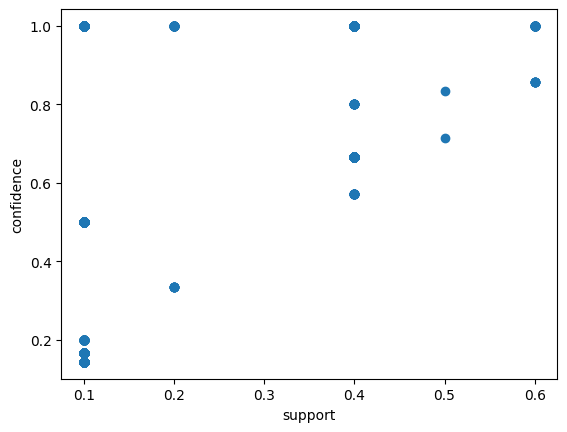

In [ ]:
from typing import SupportsRound
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Association rules with 15% support & 80 % confidence

In [ ]:
#with 15% support
frequent_itemsets1=apriori(movie1,min_support=0.15,use_colnames=True)


frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Patr..."
77,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, V1_G..."
78,0.4,"(Sixth Sense, V3_Sixth Sense, V2_Patriot, V1_G..."
79,0.4,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator, Pat..."


In [ ]:
#80% confidence 
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.8) # min_threshold is Confidence
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, V1_Gladiator, Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V2_Patriot),"(Sixth Sense, V3_Sixth Sense, V1_Gladiator, Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Patriot),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, V1_G...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [ ]:
#lift ratio>1 is good influential rule in selecting association transaction

rules1[rules1.lift>1]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, V1_Gladiator, Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V2_Patriot),"(Sixth Sense, V3_Sixth Sense, V1_Gladiator, Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Patriot),"(Sixth Sense, V3_Sixth Sense, V2_Patriot, V1_G...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


Visualization

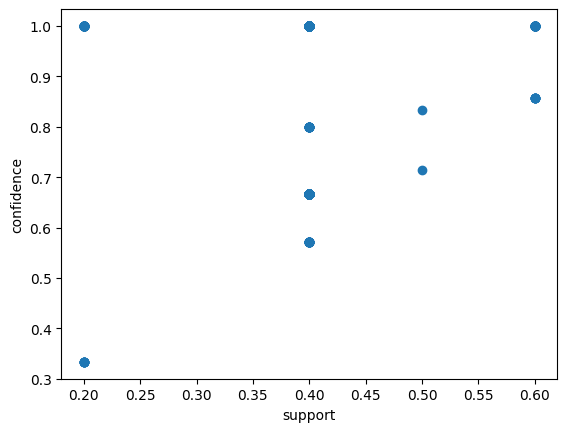

In [ ]:
from typing import SupportsRound
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()